# Actividad 1 Algoritmos geneticos

TO-DO:
- Agregar el problema
- Agregar las instrucciones y datos iniciales y concidos del problema

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

from my_lib.utility import normalizar, desnormalizar,binarizar,bin_to_dec,generar_poblacion, get_espacio_matriz,ordenar_poblacion,cruzar_individuos,buscar_individuo

ImportError: cannot import name 'cruzar_individuos' from 'my_lib.utility' (e:\python_proy\metahueristicos\my_lib\utility.py)

## Codificar el dominio de la solucion

In [ ]:
# Establecer el conjunto solucion
espacio_busqueda_src = np.linspace(-1,1,64)

# Establecer la funcion costo
def costo (x):
    return x**2

### Mostrar graficamente el conjunto solucion

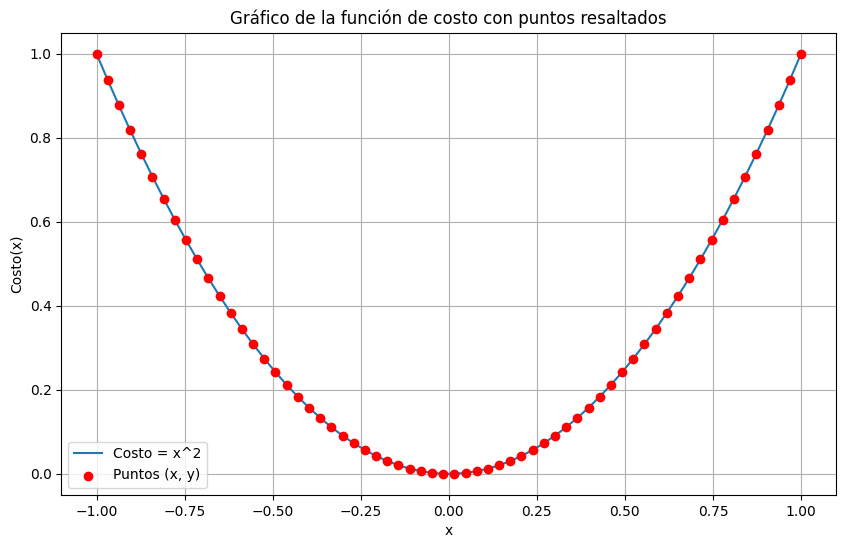

In [ ]:
# Evaluar la función de costo para cada valor en conjunto_solucion
valores_costo = costo(espacio_busqueda_src)

# Establecer el tamaño de la gráfica
plt.figure(figsize=(10, 6))  # 10 pulgadas de ancho, 6 pulgadas de alto

# Graficar la función de costo
plt.plot(espacio_busqueda_src, valores_costo, label='Costo = x^2')

# Resaltar los puntos x,y en la gráfica con scatter
plt.scatter(espacio_busqueda_src, valores_costo, color='red', label='Puntos (x, y)', zorder=5)

# Añadir etiquetas y leyendas
plt.xlabel('x')
plt.ylabel('Costo(x)')
plt.title('Gráfico de la función de costo con puntos resaltados')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Codificacion del dominio

In [ ]:
# Normalizar espacio de busqueda en valores de [0,63]
espacio_busqueda_norm = normalizar(espacio_busqueda_src,
                                   0,
                                   63)

#Codificar a binario el espacio de busqueda
espacio_busqueda_bin = binarizar(nbites=6,
                                 datos=espacio_busqueda_norm)

In [ ]:
espacio_busqueda = np.zeros((espacio_busqueda_src.shape[0],4),dtype=object)

espacio_busqueda[:,0] = espacio_busqueda_src

espacio_busqueda[:,1] = np.round(espacio_busqueda_norm, decimals=0)

espacio_busqueda [:,2] = espacio_busqueda_bin

espacio_busqueda [:,3] = [costo(x) for x in espacio_busqueda_src]

print(espacio_busqueda)

[[-1.0 0.0 '000000' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [-0.9365079365079365 2.0 '000010' 0.8770471151423532]
 [-0.9047619047619048 3.0 '000011' 0.8185941043083901]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [-0.8412698412698413 5.0 '000101' 0.7077349458301839]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [-0.746031746031746 8.0 '001000' 0.5565633660871756]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [-0.6825396825396826 10.0 '001010' 0.46586041824137064]
 [-0.6507936507936508 11.0 '001011' 0.4235323759133283]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [-0.46031746031746035 17.0 '010001' 0.2118921642731167]
 [-0.4285714285714286 18.0 '010010'

## Generar poblacion aleatoria

In [ ]:
#Generar una poblacion inicial aleatoria de 10 individuos
poblacion = generar_poblacion(espacio_busqueda,10)
print(poblacion)

[[0.23809523809523814 39.0 '100111' 0.056689342403628135]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.17460317460317465 26.0 '011010' 0.030486268581506694]
 [0.4285714285714284 45.0 '101101' 0.18367346938775495]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]]


## Ordenar la poblacion

In [ ]:
# Se ordena la población de mayor a menor aptitud
pob_ord = ordenar_poblacion(poblacion)
print(pob_ord)

[[0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [0.4285714285714284 45.0 '101101' 0.18367346938775495]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [0.23809523809523814 39.0 '100111' 0.056689342403628135]
 [-0.17460317460317465 26.0 '011010' 0.030486268581506694]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]]


## Algo

### Guardar generacion

In [ ]:
GENERACIONES = np.array([pob_ord])
GEN_CRIT = 10
#GENERACIONES = np.vstack([GENERACIONES,[pob_ord]])
N_GEN = len(GENERACIONES)

To do:
* 1 métodos elitista 
* 2 métodos de selección
* 2 métodos de cruza y su justificación
* método de paro --->epsilon con un umbral y for 

## Cruzar primera generacion

#### Métodos de cruza

In [ ]:
def un_corte(n_cromos,padre,madre): 
    # división de padre y madre en dos mitades
    cromos_p = np.array([padre[:int(n_cromos/2)], 
                         padre[-int(n_cromos/2):]])
    cromos_m = np.array([madre[:int(n_cromos/2)],
                         madre[-int(n_cromos/2):]])
    
    hijo1 = f'{cromos_p[0]}{cromos_m[1]}'
    hijo2 = f'{cromos_m[1]}{cromos_p[0]}'
    
    hijo1 = f'{cromos_m[0]}{cromos_p[1]}{cromos_m[2]}'
    hijo2 = f'{cromos_p[0]}{cromos_m[1]}{cromos_p[2]}'
    #print([hijo1,hijo2])
    return hijo1,hijo2 

def cruza_homogenea(n_cromos,padre,madre):
    hijo1 = []
    hijo2 = []
    for j in range(n_cromos):
        #selecciona de forma aleatoria de que padre/madre proviene el bit para cada hijo
        if random.random() < 0.5: # 50% de probabilidad
            hijo1.append(padre[j])
            hijo2.append(madre[j])
        else:
            hijo1.append(madre[j])
            hijo2.append(padre[j])
    
    # Convertir las listas de bits a cadenas
    hijo1 = ''.join(hijo1)
    hijo2 = ''.join(hijo2)
    #print([hijo1,hijo2])
    return (hijo1,hijo2)

Hijos de 111001 y 001001
['111001', '001111']
Hijos de 110101 y 101101
['110101', '101110']
Hijos de 101100 y 101010
['101010', '010101']
Hijos de 100111 y 011010
['100010', '010100']
Hijos de 100101 y 011011
['100011', '011100']


#### Métodos de selección

In [10]:
def rank(pob,espacio):
    # número total de individuos de la población 
    n = len(pob_ord)
    # longitud del cromosoma de cada individuo - col 3
    n_cromos = len(pob_ord[0,2])

    nueva_pob = pob.copy()
    for i in range(0,n,2):
        padre = pob[i,2]
        madre = pob[i+1,2]
        #print(f"Hijos de {padre} y {madre}")
        
        # se cambia el tipo de cruza que se quiera emplear 
        aux_1,aux_2 = un_corte(n_cromos,padre,madre)
        # hijo1,hijo2 = dos_cortes(n_cromos,padre,madre)
        # hijo1,hijo2 = cruza_homogenea(n_cromos,padre,madre)
        hijo_1 = buscar_individuo(espacio, aux_1)
        hijo_2 = buscar_individuo(espacio, aux_2)

        nueva_pob = np.vstack([nueva_pob, hijo_1])
        nueva_pob = np.vstack([nueva_pob, hijo_2])
    return nueva_pob

def ale_monogamico(pob,espacio):
    # número total de individuos de la población 
    n = len(pob_ord)
    # longitud del cromosoma de cada individuo - col 3
    n_cromos = len(pob_ord[0,2])
    # índices de los individuos 
    indice = list(range(n))
    # lista de índices monogámico de forma aleatoria
    random.shuffle(indice)
    nueva_pob = pob.copy()
    for i in range(0,n,2):
        # selección de índices consecutivos para un par de padres y asegura que no se repita la selección
        padre = indice[i]
        madre = indice[i+1]

        padre_m = pob_ord[padre,2]
        madre_m = pob_ord[madre,2]

        #print(f"Hijos de {padre_m} y {madre_m}")

        #hm = un_corte(n_cromos, padre_m,madre_m)
        aux_1,aux_2 = dos_cortes(n_cromos,padre_m,madre_m)
        #hm = cruza_homogenea(n_cromos,padre_m,madre_m)
        hijo_1 = buscar_individuo(espacio, aux_1)
        hijo_2 = buscar_individuo(espacio, aux_2)

        nueva_pob = np.vstack([nueva_pob, hijo_1])
        nueva_pob = np.vstack([nueva_pob, hijo_2])

    return nueva_pob

def ale_poligamico(pob,espacio):
    # número total de individuos de la población 
    n = len(pob_ord)
    # longitud del cromosoma de cada individuo - col 3
    n_cromos = len(pob_ord[0,2])
    # número de crices a realizar 
    n_cruces = 5
    # n_cruces = n/2
    nueva_pob = pob.copy()
    for i in range(n_cruces):
        # selección de índices consecutivos para un par de padres y asegura que no se repita la selección
        padre = random.randint(0,n-1)
        madre = random.randint(0,n-1)

        padre_p = pob_ord[padre,2]
        madre_p = pob_ord[madre,2]

        #print(f"Hijos de {padre_p} y {madre_p}")

        #hp = un_corte(n_cromos, padre_p, madre_p)
        #hp = dos_cortes(n_cromos,padre_p,madre_p)
        aux_1,aux_2 = cruza_homogenea(n_cromos,padre_p,madre_p)
        hijo_1 = buscar_individuo(espacio, aux_1)
        hijo_2 = buscar_individuo(espacio, aux_2)

        nueva_pob = np.vstack([nueva_pob, hijo_1])
        nueva_pob = np.vstack([nueva_pob, hijo_2])

    return nueva_pob


1) Rank

In [ ]:
monogamico_gen = ale_monogamico(pob_ord,espacio_busqueda)
print(monogamico_gen)

[[0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [0.4285714285714284 45.0 '101101' 0.18367346938775495]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [0.23809523809523814 39.0 '100111' 0.056689342403628135]
 [-0.17460317460317465 26.0 '011010' 0.030486268581506694]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [-0.33333333333333337 21.0 '010101' 0.11111111111111113]
 [0.0793650793650793 34.0 '100010' 0.006298815822625337]
 [-0.3650793650793651 20.0 '010100' 

3) Aleatorio poligámico

In [15]:

poligamico_gen = ale_poligamico(pob_ord,espacio_busqueda)
print(poligamico_gen)

[[0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [0.7142857142857142 54.0 '110110' 0.510204081632653]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3015873015873016 22.0 '010110' 0.09095490047871002]
 [-0.2063492063492064 25.0 '011001' 0.04257999496094736]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [0.20634920634920628 38.0 '100110' 0.04257999496094732]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.11111111111111116 28.0 '011100' 0.0

#### promedio de diferentes métodos de cruza de individuos

In [16]:
costos = [rank_gen[:,3],monogamico_gen[:,3],poligamico_gen[:,3]]
nombres = ['rank', 'A. monogámico', 'A. poligámico'] 

for nombre,i in zip(nombres,costos):
    costo_promedio = np.mean(i)
    print(f'costo promedio de {nombre} = {costo_promedio}')

costo promedio de rank = 0.3148904006046863
costo promedio de A. monogámico = 0.27256235827664393
costo promedio de A. poligámico = 0.2745779793398841


### Mutación

In [17]:
def mutacion(individuo):
    """
    Mutación que cambia un bit aleatorio de cada individuo,
    cambiando el 0 por 1.
    """
    # convertir el individuo binario a una lista de bits
    bits = list(individuo)
    # seleccionar un índice aleatorio para mutar 
    index = random.randint(0,5)

    #mutar el bit en el índice seleccionado
    if bits[index] == '0':
        bits[index] = '1'
    else:
        bits[index] = '0'

    # convertir la lista de bits de vuelta a una cadena binaria
    individuo_mutado = ''.join(bits)

    return individuo_mutado

### Ordenar por aptitud para poder seleccionar los más aptos

In [ ]:
new_age_ord = ordenar_poblacion(new_age)
print(new_age_ord)

[[0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [0.4285714285714284 45.0 '101101' 0.18367346938775495]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [-0.33333333333333337 21.0 '010101' 0.11111111111111113]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [0.23809523809523814 39.0 '100111' 0.056689342403628135]
 [-0.17460317460317465 26.0 '011010' 0.030486268581506694]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.11111111111111116 35.0 '100011' 

### Pan bimbo artesanal

In [ ]:
ind_unicos = np.array([new_age_ord[0,:]])

for i in range (1,new_age_ord.shape[0]):
    norm_ind = new_age_ord[i,1]
    if not norm_ind in ind_unicos[:,1]:
        ind_unicos = np.vstack([ind_unicos,new_age_ord[i,:]])
    
    
print(ind_unicos)
print(ind_unicos.shape)

[[0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [0.6825396825396823 53.0 '110101' 0.46586041824137037]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [0.46031746031746024 46.0 '101110' 0.21189216427311658]
 [0.4285714285714284 45.0 '101101' 0.18367346938775495]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [-0.33333333333333337 21.0 '010101' 0.11111111111111113]
 [0.33333333333333326 42.0 '101010' 0.11111111111111106]
 [0.23809523809523814 39.0 '100111' 0.056689342403628135]
 [-0.17460317460317465 26.0 '011010' 0.030486268581506694]
 [0.17460317460317443 37.0 '100101' 0.030486268581506614]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.11111111111111116 35.0 '100011' 0.01234567901234569]
 [-0.11111111111111116 28.0 '011100' 0.01234567901234569]
 [0.0793650793650793 34.0 '100010' 0.006298815822625337]]
(17, 4)


### Optimus prime

In [ ]:
def seleccion_ruleta (poblacion):
    #Valores unicos
    _, indices_unicos = np.unique(poblacion[:,1],return_index=True)
    indiv_unicos = poblacion[indices_unicos]

    #Ordenar por aptitud
    indiv_unicos = ordenar_poblacion(poblacion)
    
    #Aptitud total
    apt_total = np.sum(indiv_unicos[:,3])
    #Probabilidad por aptitud
    prob_apt = indiv_unicos[:,3]/apt_total
    #Probabilidad acumulada
    prob_acum = np.cumsum(prob_apt)
    
    indices = np.searchsorted(prob_acum,np.random.rand(2))
    return indiv_unicos[indices]


def cruce_un_corte(padres):
    n_genes = len(padres[0,2])
    p1 = padres[0,2]
    p2 = padres[1,2]
    
    cromos_p1 = np.array([p1[: int(n_genes / 2)], p1[-int(n_genes / 2):]])
    cromos_p2 = np.array([p2[: int(n_genes / 2)], p2[-int(n_genes / 2):]])
    
    h1 = f"{cromos_p2[0]}{cromos_p1[1]}"
    h2 = f"{cromos_p1[0]}{cromos_p2[1]}"
    
    # print(cromos_p1,h1)
    # print(cromos_p2,h2)
    
    return h1,h2
    
def seleccionar_padres (pob_tam,poblacion):
    prole = []
    for i in range (pob_tam):
        #print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        padres = seleccion_ruleta(poblacion)
        #print(f"pareja {i+1}: {padres[:,2]}")
        h1,h2 = cruce_un_corte(padres)
        
        prole.append([h1,padres[:,2]])
        prole.append([h2,padres[:,2]])
    
    return prole

def buscar_individuos(hijos,espacio,columna=2):
    hijos_individuos = [i[0] for i in hijos]
    
    hijos_individuos = np.array(hijos_individuos)
    # print(espacio[:,2])
    # print(hijos_individuos)
    for i,hijo in enumerate(hijos_individuos):
        indice = np.where(espacio[:,2] == hijo)
        print(espacio[indice,:])
        
        

In [ ]:
prole = seleccionar_padres(5,new_age_ord)
for p in prole:
    print(p)
buscar_individuos(prole,espacio_busqueda)

['110001', array(['001001', '110101'], dtype=object)]
['001101', array(['001001', '110101'], dtype=object)]
['101010', array(['101010', '101101'], dtype=object)]
['101101', array(['101010', '101101'], dtype=object)]
['110001', array(['111001', '110101'], dtype=object)]
['111101', array(['111001', '110101'], dtype=object)]
['101110', array(['101110', '101100'], dtype=object)]
['101100', array(['101110', '101100'], dtype=object)]
['110111', array(['001111', '110101'], dtype=object)]
['001101', array(['001111', '110101'], dtype=object)]
[[[0.5555555555555554 49.0 '110001' 0.30864197530864174]]]
[[[-0.5873015873015873 13.0 '001101' 0.344923154446964]]]
[[[0.33333333333333326 42.0 '101010' 0.11111111111111106]]]
[[[0.4285714285714284 45.0 '101101' 0.18367346938775495]]]
[[[0.5555555555555554 49.0 '110001' 0.30864197530864174]]]
[[[0.9365079365079363 61.0 '111101' 0.8770471151423528]]]
[[[0.46031746031746024 46.0 '101110' 0.21189216427311658]]]
[[[0.39682539682539675 44.0 '101100' 0.15747039

In [ ]:
# Trabajar solo con los valores únicos
_, unique_indices = np.unique(new_age_ord[:, 1], return_index=True)
ind_unicos = new_age_ord[unique_indices]

# Ordenar la población
ind_unicos = ordenar_poblacion(ind_unicos)

# Sumar la aptitud total de los individuos
apt_total = np.sum(ind_unicos[:, 3])
prob_apt = ind_unicos[:, 3] / apt_total
prob_acum = np.cumsum(prob_apt)

# Selección por ruleta usando np.searchsorted
indices = np.searchsorted(prob_acum, np.random.rand(100000))

In [ ]:
import plotly.express as px
import numpy as np

# Crear un histograma usando Plotly
fig = px.histogram(x=indices, nbins=100, title="Distribución de la Selección por Ruleta",
                   labels={'x': 'Índice del Individuo', 'y': 'Frecuencia'},
                   text_auto=True)

# Mostrar el histograma
fig.show()

NameError: name 'indices' is not defined

In [ ]:
#Trabjar solo con los valores unicos
_, unique_indices = np.unique(new_age_ord[:, 1], return_index=True)
ind_unicos = new_age_ord[unique_indices]

ind_unicos = ordenar_poblacion(ind_unicos)

# print(ind_unicos)

indices = []
#Sumar la aptitud total de los individuos
apt_total = np.sum(ind_unicos[:,3])
prob_apt = ind_unicos[:,3] / apt_total
prob_acum = np.cumsum(prob_apt)

for _ in range (100000):
    r = np.random.rand()
    min_r = 0
    for i,prob in enumerate(prob_acum):
        max_r = prob
        if r >= min_r and r < max_r:
            indices.append(i)
            break   
        min_r = max_r    

In [ ]:
import plotly.express as px

# Crear un histograma usando Plotly
fig = px.histogram(x=indices, nbins=16, title="Distribución de la Selección por Ruleta",
                   labels={'x': 'Índice del Individuo', 'y': 'Frecuencia'},
                   text_auto=True)

# Mostrar el histograma
fig.show()


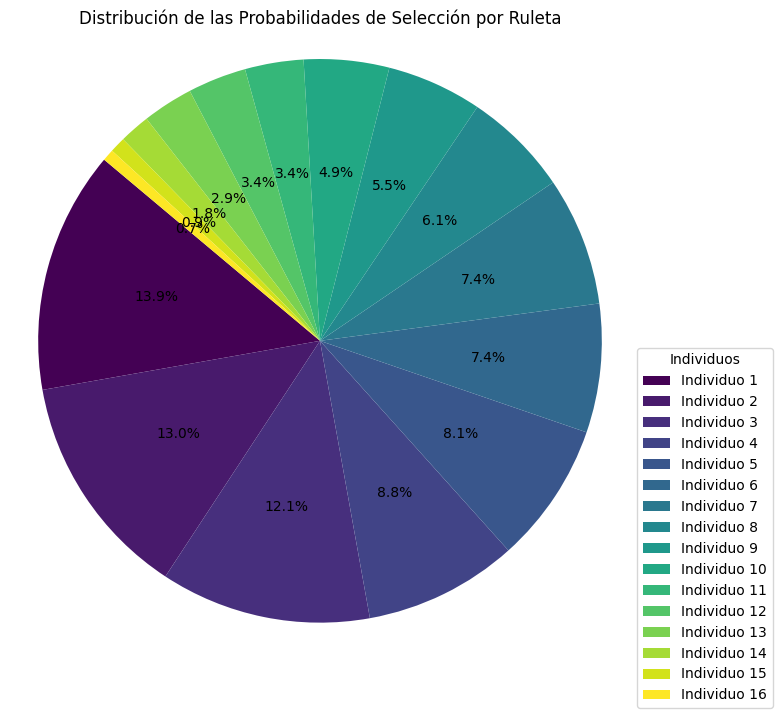

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de valores de fitness proporcionados
fitness_values = [0.13897317151069943, 0.1297109549664644, 0.12076812519961679,
                  0.08819067390610032, 0.08084477802618974, 0.07381826892366658,
                  0.07381826892366654, 0.060723411050782515, 0.05465506228042161,
                  0.04890610028744812, 0.033575534972852136, 0.03357553497285212,
                  0.029104120089428313, 0.017606196103481315, 0.008982753114021086,
                  0.006747045672309164]

# Crear etiquetas para los individuos
labels = [f'Individuo {i+1}' for i in range(len(fitness_values))]

# Generar los colores para cada segmento
colors = plt.cm.viridis(np.linspace(0, 1, len(fitness_values)))

# Generar gráfico de pastel sin etiquetas en el gráfico
plt.figure(figsize=(8, 8))
plt.pie(fitness_values, colors=colors, autopct='%1.1f%%', startangle=140)

# Añadir la leyenda aparte con los nombres de los individuos y los colores
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5), title="Individuos")
plt.title('Distribución de las Probabilidades de Selección por Ruleta')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()


In [ ]:
arr = new_age_ord.copy()
# Convertir filas a tuplas para permitir la comparación de elementos
arr = np.array([tuple(row) for row in arr])

# Obtener las filas únicas y el recuento de cada fila
unique_rows, counts = np.unique(arr, axis=0, return_counts=True)

# Filas únicas (aparecen una sola vez)
unique_only = unique_rows[counts == 1]

# Filas repetidas (aparecen más de una vez)
discarded_rows = unique_rows[counts > 1]

print("Filas únicas:\n", unique_only)
print("Filas descartadas:\n", discarded_rows)

Filas únicas:
 [['-0.11111111111111116' '28.0' '011100' '0.01234567901234569']
 ['-0.1428571428571429' '27.0' '011011' '0.020408163265306135']
 ['-0.17460317460317465' '26.0' '011010' '0.030486268581506694']
 ['-0.33333333333333337' '21.0' '010101' '0.11111111111111113']
 ['-0.3650793650793651' '20.0' '010100' '0.13328294280675235']
 ['-0.5238095238095238' '15.0' '001111' '0.2743764172335601']
 ['-0.7142857142857143' '9.0' '001001' '0.5102040816326531']
 ['0.0793650793650793' '34.0' '100010' '0.006298815822625337']
 ['0.11111111111111116' '35.0' '100011' '0.01234567901234569']
 ['0.17460317460317443' '37.0' '100101' '0.030486268581506614']
 ['0.23809523809523814' '39.0' '100111' '0.056689342403628135']
 ['0.39682539682539675' '44.0' '101100' '0.1574703955656336']
 ['0.4285714285714284' '45.0' '101101' '0.18367346938775495']
 ['0.46031746031746024' '46.0' '101110' '0.21189216427311658']]
Filas descartadas:
 [['0.33333333333333326' '42.0' '101010' '0.11111111111111106']
 ['0.682539682539